

Everything already have in the directory.

Everything already have in the directory.
Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D

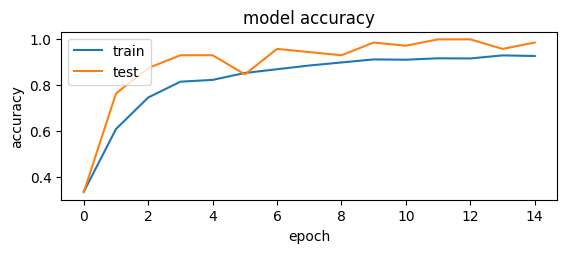

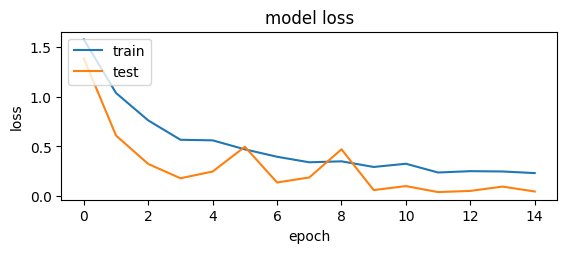

Test set shape :  (72, 200, 200, 3)
3/3 [==============================] - 0s 51ms/step


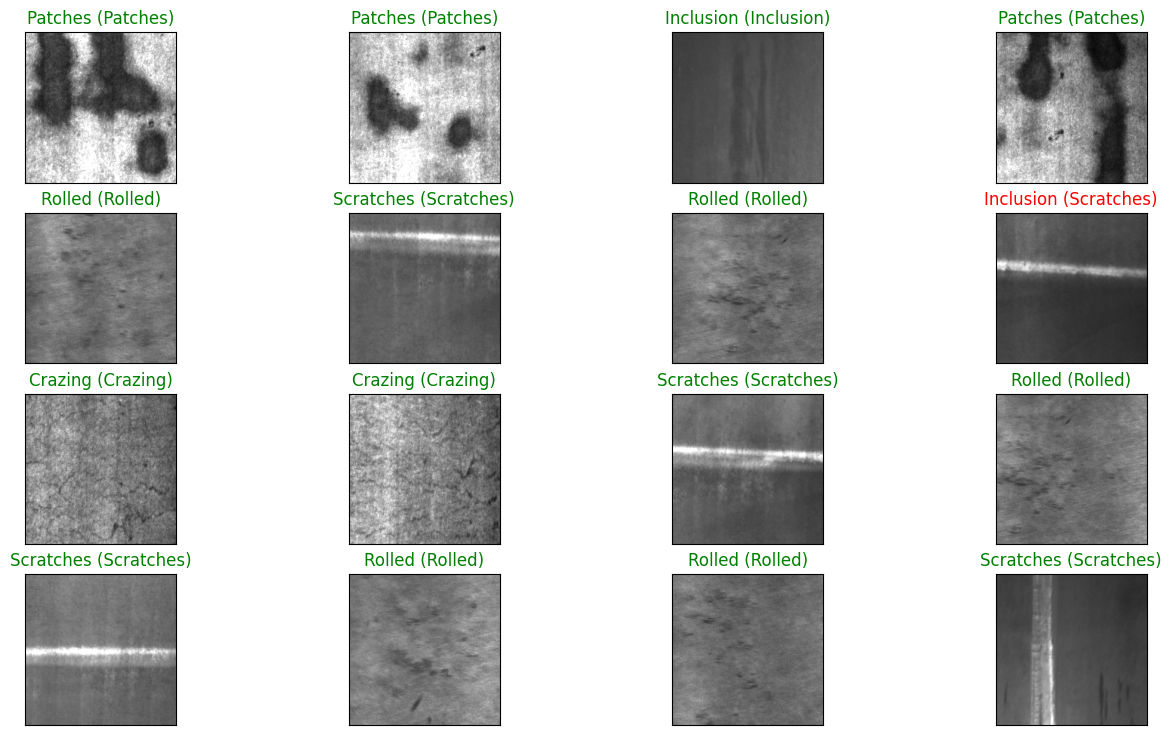

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

try:
    source1 = "NEU/train"
    os.mkdir("NEU/test")
    dest11 = "NEU/test"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory.")

## Divide the test data into test and validation data

try:
    source1 = "NEU/test"
    os.mkdir("NEU/valid")
    dest11 = "NEU/valid"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory.")

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'NEU/train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        'NEU/valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
plt.figure(2)    
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np

test_dir = 'NEU/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

no_of_classes = len(np.unique(y_test))
no_of_classes

import np_utils
from keras.utils import to_categorical
y_test = to_categorical(y_test,no_of_classes)


from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

x_test = x_test.astype('float32')/255

# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))